### 範例1： 練習爬取台幣對其他貨幣匯率資料
進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [1]:
import requests
from bs4 import BeautifulSoup

url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
res = requests.get(url)
soup = BeautifulSoup(res.text,'html.parser')
u = soup.find('tbody').find('tr')
usd = u.find(class_='hidden-phone print_show')
usd = usd.text.lstrip().rstrip()

buy_rate = u.find('td',attrs={'data-table':'本行現金買入'})
buy_rate = buy_rate.text

sell_rate = u.find('td',attrs={'data-table':'本行現金賣出'})
sell_rate = sell_rate.text

print('幣別：{}'.format(usd))
print('台銀現金買入：{}  台銀現金賣出：{}'.format(buy_rate,sell_rate))

幣別：美金 (USD)
台銀現金買入：29.17  台銀現金賣出：29.84


### 台灣銀行牌告匯率爬蟲練習

* 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率


In [2]:
import requests
from bs4 import BeautifulSoup

url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
res = requests.get(url)
soup = BeautifulSoup(res.text,'html.parser')
lis = soup.find('tbody').find_all('tr')

for i in lis:
    currency = i.find(class_='hidden-phone print_show')
    currency = currency.text.lstrip().rstrip()
    
    buy_rate = i.find('td',attrs={'data-table':'本行現金買入'})
    buy_rate = buy_rate.text

    sell_rate = i.find('td',attrs={'data-table':'本行現金賣出'})
    sell_rate = sell_rate.text
    
    print('幣別：{}'.format(currency))
    print('台銀現金買入：{}  台銀現金賣出：{}'.format(buy_rate,sell_rate))
    print('')

幣別：美金 (USD)
台銀現金買入：29.17  台銀現金賣出：29.84

幣別：港幣 (HKD)
台銀現金買入：3.659  台銀現金賣出：3.863

幣別：英鎊 (GBP)
台銀現金買入：35.64  台銀現金賣出：37.76

幣別：澳幣 (AUD)
台銀現金買入：20.13  台銀現金賣出：20.91

幣別：加拿大幣 (CAD)
台銀現金買入：21.31  台銀現金賣出：22.22

幣別：新加坡幣 (SGD)
台銀現金買入：20.63  台銀現金賣出：21.54

幣別：瑞士法郎 (CHF)
台銀現金買入：30.42  台銀現金賣出：31.62

幣別：日圓 (JPY)
台銀現金買入：0.2659  台銀現金賣出：0.2787

幣別：南非幣 (ZAR)
台銀現金買入：-  台銀現金賣出：-

幣別：瑞典幣 (SEK)
台銀現金買入：2.79  台銀現金賣出：3.31

幣別：紐元 (NZD)
台銀現金買入：18.82  台銀現金賣出：19.67

幣別：泰幣 (THB)
台銀現金買入：0.8238  台銀現金賣出：1.0138

幣別：菲國比索 (PHP)
台銀現金買入：0.524  台銀現金賣出：0.657

幣別：印尼幣 (IDR)
台銀現金買入：0.00168  台銀現金賣出：0.00238

幣別：歐元 (EUR)
台銀現金買入：32.4  台銀現金賣出：33.74

幣別：韓元 (KRW)
台銀現金買入：0.02293  台銀現金賣出：0.02683

幣別：越南盾 (VND)
台銀現金買入：0.0009  台銀現金賣出：0.0014

幣別：馬來幣 (MYR)
台銀現金買入：5.786  台銀現金賣出：7.411

幣別：人民幣 (CNY)
台銀現金買入：4.086  台銀現金賣出：4.248



### 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
# 先到牌告匯率首頁，爬取美金表格
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
u_table = html.find('tbody').find('tr')

#截取出美金的幣值
usd = u_table.find(class_='hidden-phone print_show')
usd = usd.text.lstrip().rstrip()
#print(usd.replace(' ',''))

# 針對美金，找到其「歷史匯率」的首頁 
historyid = u_table.find('td',attrs={'data-table':'歷史匯率'}).find('a').get('href')
historylink = 'https://rate.bot.com.tw' + historyid

# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
# 如查尋2020-06的美金歷史匯率，網址會是'https://rate.bot.com.tw/xrt/quote/2020-06/USD'
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = historylink.replace("history", "quote/2020-06")
r = requests.get(quote_history_url)
r.encoding = 'utf-8'
history = BeautifulSoup(r.text, "lxml")
history_table = history.find('tbody').find_all('tr')


In [57]:
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    date = history_rate.find('a').get_text()
    date_history.append(date)  # 日期歷史資料
    ex_rate = history_rate.find_all(class_='rate-content-cash text-right print_table-cell')
    ex_buy = float(ex_rate[0].text) #若沒轉換成float會是str
    history_buy.append(ex_buy) #歷年現金買入匯率
    ex_sell = float(ex_rate[1].text)
    history_sell.append(ex_sell) #歷年現金賣出匯率
  
    

<Figure size 432x288 with 0 Axes>

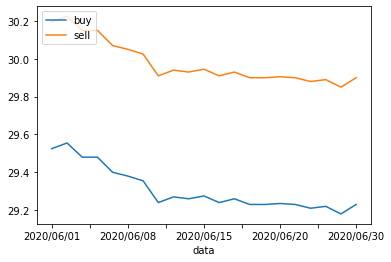

In [58]:
#將資料整理成dataFrame的形式
usd_his = pd.DataFrame({'data':date_history,'buy':history_buy,'sell':history_sell})
usd_his = usd_his.set_index('data') #將日期設定為index
usd_his = usd_his.sort_index(ascending=True) #依index遞增排列

plt.figure()
usd_his[['buy','sell']].plot()  # x=['date'](x=index), y=[['buy','sell']] 
plt.legend(loc="upper left")#標籤放在左上方
plt.show()

### get_text()和.get()的差別
* get_text()，是返回选择的标签文本，具体可以参考文档：http://beautifulsoup.readthedocs.io/zh_CN/latest/#get-text
* get('')，这是选择标签中的属性(也就是里面有=符号的左边)，比如get('href')获取其中的链接。

### pandas
有點像是python裡的excel(通常會搭配numpy一起使用)<br>
Pandas主要有兩大資料結構：<br>
* Series 欄位(一維度)
* DataFrame 表格（二維度）
* Panel 三維表格

* 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
def his_rate_plot_202006(url):
    quote_history_url = url.replace("history", "quote/2020-06")
    r = requests.get(quote_history_url)
    r.encoding = 'utf-8'
    history = BeautifulSoup(r.text, "lxml")
    history_table = history.find('tbody').find_all('tr')
    
    date_history = list()
    history_buy = list()
    history_sell = list()

    for history_rate in history_table:
        date = history_rate.find('a').get_text()
        date_history.append(date)  # 日期歷史資料
        ex_rate = history_rate.find_all(class_='rate-content-cash text-right print_table-cell')
        ex_buy = float(ex_rate[0].text) #若沒轉換成float會是str
        history_buy.append(ex_buy) #歷年現金買入匯率
        ex_sell = float(ex_rate[1].text)
        history_sell.append(ex_sell) #歷年現金賣出匯率
    
    #將資料整理成dataFrame的形式
    cur_his = pd.DataFrame({'data':date_history,'buy':history_buy,'sell':history_sell})
    cur_his = cur_his.set_index('data') #將日期設定為index
    cur_his = cur_his.sort_index(ascending=True) #依index遞增排列

    plt.figure()
    cur_his[['buy','sell']].plot()  # x=['date'](x=index), y=[['buy','sell']] 
    plt.legend(loc="upper left")#標籤放在左上方
    plt.show()

美金(USD)


<Figure size 432x288 with 0 Axes>

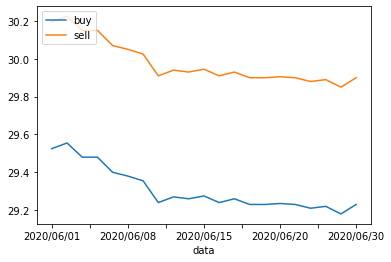

港幣(HKD)


<Figure size 432x288 with 0 Axes>

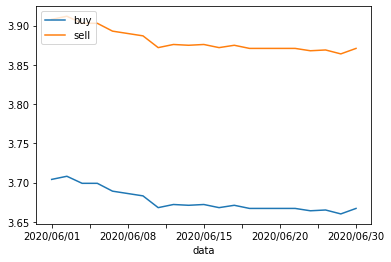

英鎊(GBP)


<Figure size 432x288 with 0 Axes>

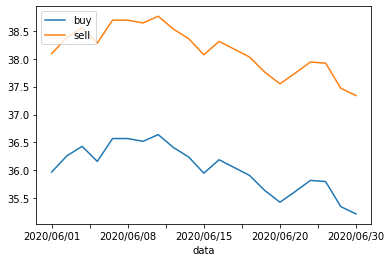

澳幣(AUD)


<Figure size 432x288 with 0 Axes>

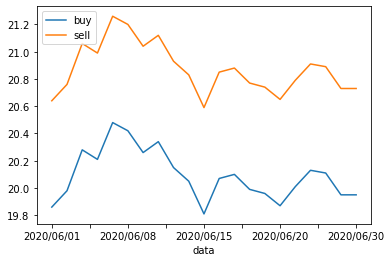

加拿大幣(CAD)


<Figure size 432x288 with 0 Axes>

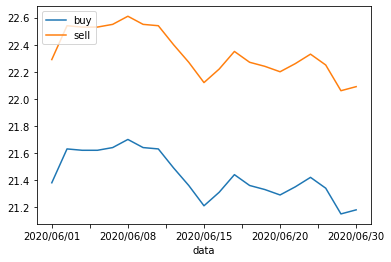

新加坡幣(SGD)


<Figure size 432x288 with 0 Axes>

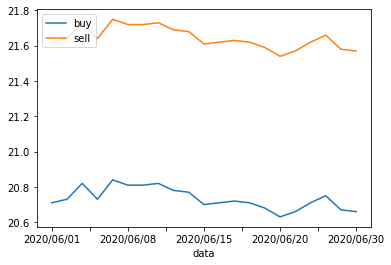

瑞士法郎(CHF)


<Figure size 432x288 with 0 Axes>

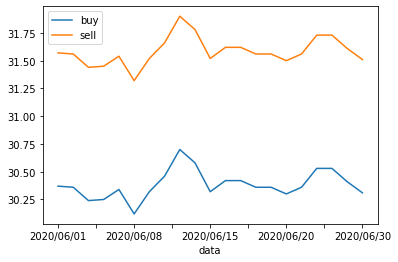

日圓(JPY)


<Figure size 432x288 with 0 Axes>

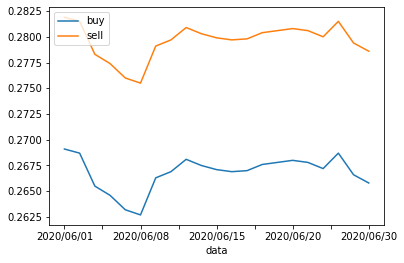

南非幣(ZAR)


<Figure size 432x288 with 0 Axes>

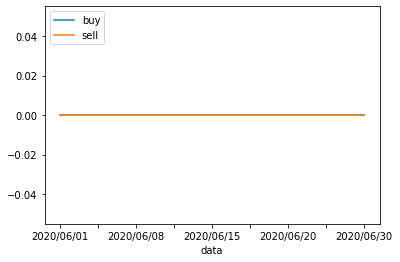

瑞典幣(SEK)


<Figure size 432x288 with 0 Axes>

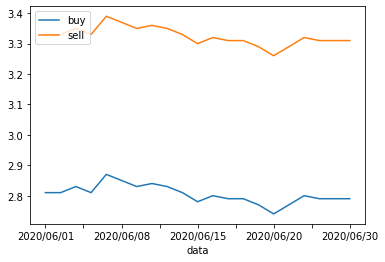

紐元(NZD)


<Figure size 432x288 with 0 Axes>

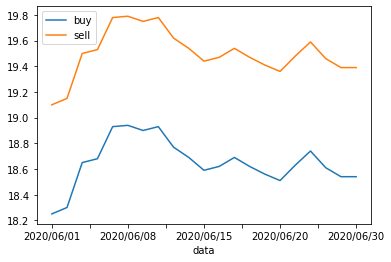

泰幣(THB)


<Figure size 432x288 with 0 Axes>

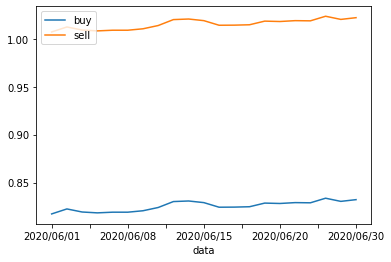

菲國比索(PHP)


<Figure size 432x288 with 0 Axes>

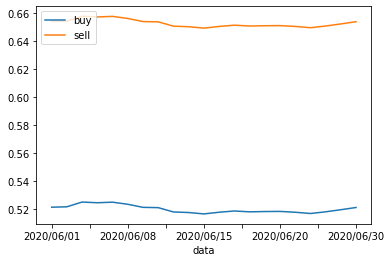

印尼幣(IDR)


<Figure size 432x288 with 0 Axes>

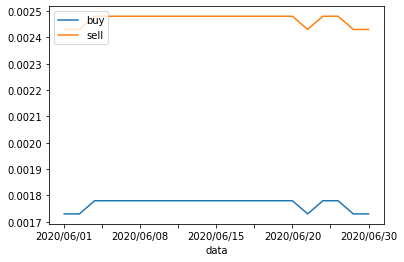

歐元(EUR)


<Figure size 432x288 with 0 Axes>

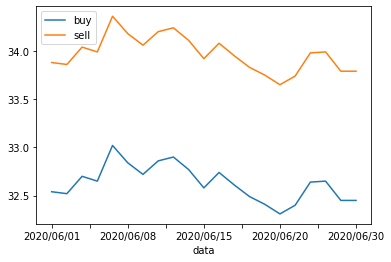

韓元(KRW)


<Figure size 432x288 with 0 Axes>

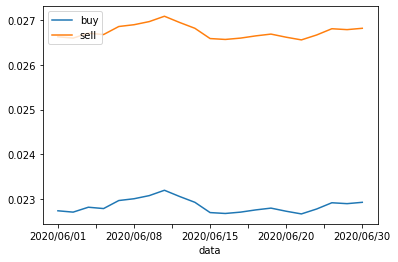

越南盾(VND)


<Figure size 432x288 with 0 Axes>

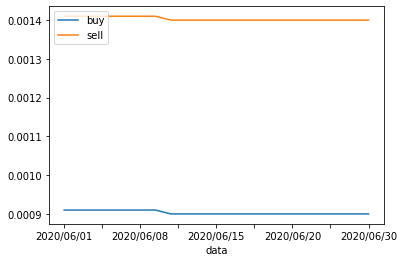

馬來幣(MYR)


<Figure size 432x288 with 0 Axes>

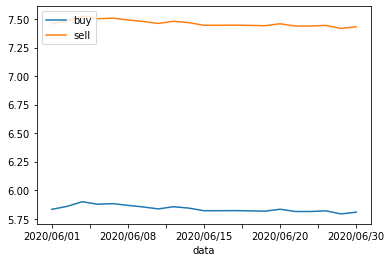

人民幣(CNY)


<Figure size 432x288 with 0 Axes>

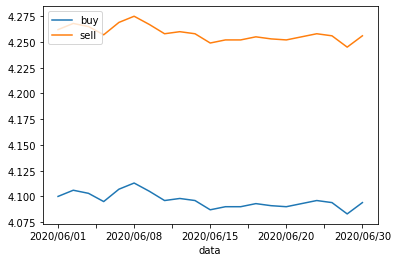

In [65]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
cur_table = html.find('tbody').find_all('tr')

for i in cur_table:
    cur = i.find(class_='hidden-phone print_show')
    cur = cur.text.lstrip().rstrip()
    print(cur.replace(' ',''))
    
    # 找到其「歷史匯率」的首頁 
    historyid = i.find('td',attrs={'data-table':'歷史匯率'}).find('a').get('href')
    historylink = 'https://rate.bot.com.tw' + historyid
    
    #繪圖
    his_rate_plot_202006(historylink)

   